In [1]:
# Importing neccessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings=("ignore")

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, auc, confusion_matrix, roc_auc_score, roc_curve, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [3]:
# Loading the train and test data.
train_df=pd.read_csv('Loan_train.csv')
test_df=pd.read_csv('Loan_Test.csv')

# Data Understanding.

In [4]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# Dropping Loan_ID
train_df=train_df.drop(['Loan_ID'],axis=1)

In [6]:
# Checking the type of categories in the Dependents Column.
train_df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [7]:
# Checking the type of categories in the Education Column.
train_df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [8]:
# Checking the type of categories in the Property_Area Column.
train_df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [10]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
train_df.shape

(614, 12)

In [12]:
test_df.shape

(367, 12)

In [13]:
# Checking if there are null values in the train dataset.
train_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Data Imputation on train data set.

In [14]:
#Categorical data is imputed with mode and numerical data is imputed with mean.

train_df['Gender']=train_df['Gender'].fillna(train_df['Gender'].mode()[0])
train_df['Married']=train_df['Married'].fillna(train_df['Married'].mode()[0])
train_df['Dependents']=train_df['Dependents'].fillna(train_df['Dependents'].mode()[0])
train_df['Self_Employed']=train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0])

train_df['LoanAmount']=train_df['LoanAmount'].fillna(train_df['LoanAmount'].mean())
train_df['Loan_Amount_Term']=train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mean())
train_df['Credit_History']=train_df['Credit_History'].fillna(train_df['Credit_History'].mean())

In [15]:
# Hence we have successfully imputed the missing data.
train_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Data Visualization.

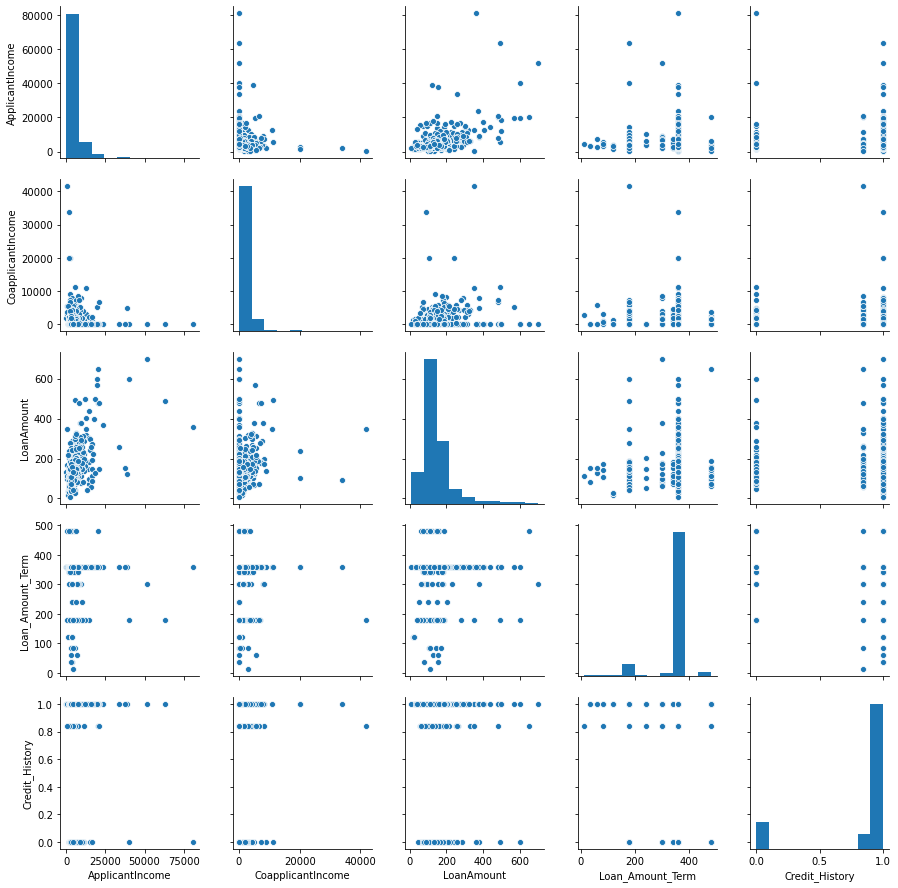

In [16]:
sns.pairplot(train_df)

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

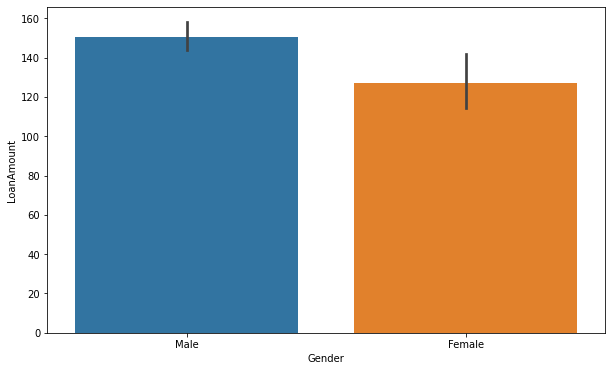

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender',y='LoanAmount',data=train_df)

In [18]:
# It can be seen that there are more number of males applying for loan compared to females.

<AxesSubplot:xlabel='Gender', ylabel='Loan_Amount_Term'>

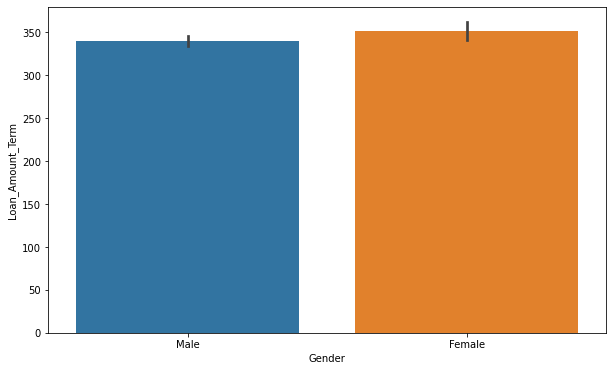

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender',y='Loan_Amount_Term',data=train_df)

In [20]:
# The term of loan taken is higher for the Female gender.

# Label encoding categorical values for train data.

In [21]:
cat_cols=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le=LabelEncoder()
for i in cat_cols:
    train_df[i]=le.fit_transform(train_df[i])
train_df.dtypes    

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

# DistributionPlot 

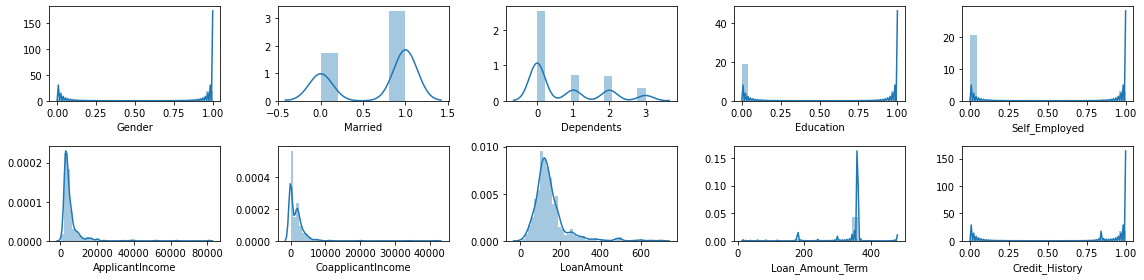

In [22]:
rows=2
cols=5
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(16,4))
col=train_df.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.distplot(train_df[col[index]],ax=ax[i][j])
        index=index+1
        
plt.tight_layout()

# LogTransformation.

In [23]:
# we need to apply log transformations in order to bring the graph into a symmetric bell curve graph.
# We need to apply log transformations on ApplicantIncome,CoapplicantIncome, and LoanAmount.

In [24]:
train_df['totalIncome']=train_df['ApplicantIncome']+train_df['CoapplicantIncome']

In [25]:
train_df['LogTotalIncome']=np.log(train_df['totalIncome'])

In [26]:
train_df['LogLoanAmount']=np.log(train_df['LoanAmount'])

In [27]:
train_df.keys()

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'totalIncome', 'LogTotalIncome', 'LogLoanAmount'],
      dtype='object')

# Splitting the dataset.

In [28]:
X=train_df.drop(labels=['Loan_Status'],axis=1)
Y=train_df['Loan_Status']
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,totalIncome,LogTotalIncome,LogLoanAmount
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,5849.0,8.674026,4.986426
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,6091.0,8.714568,4.852030
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,3000.0,8.006368,4.189655
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,4941.0,8.505323,4.787492
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,6000.0,8.699515,4.948760


In [29]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [30]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=40)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(491, 14) (123, 14) (491,) (123,)


# Logistic Regression.

In [31]:
#fit the model on train data 
log_reg = LogisticRegression().fit(X_train, Y_train)

#predict on train 
train_preds = log_reg.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds))

#predict on test
test_preds = log_reg.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds))
print('-'*50)

#We got good accuracy which means our model is performing quite well 
#ROC 
print("ROC score on train is: ", roc_auc_score(Y_train, train_preds))
print("ROC score on test is: ", roc_auc_score(Y_test, test_preds))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds).sum(),'/',((Y_test == test_preds).sum()+(Y_test != test_preds).sum()))
print('-'*50)

# Kappa Score.
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds))

Model accuracy on train is:  0.8044806517311609
Model accuracy on test is:  0.8373983739837398
--------------------------------------------------
ROC score on train is:  0.7145868624129492
ROC score on test is:  0.6881136044880785
--------------------------------------------------
confusion_matrix train is:  [[ 73  88]
 [  8 322]]
confusion_matrix test is:  [[12 19]
 [ 1 91]]
Wrong predictions out of total
--------------------------------------------------
20 / 123
--------------------------------------------------
KappaScore is:  0.46591402518454184


C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [32]:
test_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [33]:
test_preds,Y_test

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
        0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1]), 439    1
 348    1
 459    0
 71     1
 51     1
       ..
 200    1
 192    0
 159    1
 372    1
 275    1
 Name: Loan_Status, Length: 123, dtype: int32)

In [34]:
ddf=pd.DataFrame(data=[test_preds,Y_test])

In [35]:
ddf.T

,0,1
0,1,1
1,1,1
2,1,0
3,1,1
4,1,1
...,...,...
118,1,1
119,1,0
120,1,1
121,1,1


In [36]:
# Above 0 means Predicted Value and 1 is True Value.

In [37]:
import scikitplot as skplt
import matplotlib.pyplot as plt

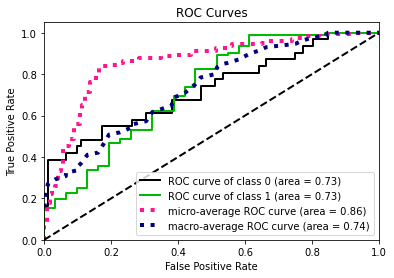

In [38]:
skplt.metrics.plot_roc(Y_test,log_reg.predict_proba(X_test))
plt.show()

# NaiveBayes Classifier.

In [39]:
NB=GaussianNB()
NB.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [40]:
#fit the model on train data 
NB=GaussianNB()
NB.fit(X_train,Y_train)

#predict on train 
train_preds2 = NB.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds2))

#predict on test
test_preds2 = NB.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds2))
print('-'*50)

#We got good accuracy which means our model is performing quite well 
#ROC 
print("ROC score on train is: ", roc_auc_score(Y_train, train_preds2))
print("ROC score on test is: ", roc_auc_score(Y_test, test_preds2))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds2))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds2))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds2).sum(),'/',((Y_test == test_preds2).sum()+(Y_test != test_preds2).sum()))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds2))

Model accuracy on train is:  0.7942973523421588
Model accuracy on test is:  0.8130081300813008
--------------------------------------------------
ROC score on train is:  0.7149632975719933
ROC score on test is:  0.6718092566619915
--------------------------------------------------
confusion_matrix train is:  [[ 78  83]
 [ 18 312]]
confusion_matrix test is:  [[12 19]
 [ 4 88]]
Wrong predictions out of total
--------------------------------------------------
23 / 123
--------------------------------------------------
KappaScore is:  0.40927124660680725


# DecisionTree.

In [41]:
#fit the model on train data 
DT = DecisionTreeClassifier().fit(X,Y)

#predict on train 
train_preds3 = DT.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds3))

#predict on test
test_preds3 = DT.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds3))
print('-'*50)

#We got good accuracy which means our model is performing quite well 
#ROC 
print("ROC score on train is: ", roc_auc_score(Y_train, train_preds3))
print("ROC score on test is: ", roc_auc_score(Y_test, test_preds3))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds3))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds3))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds3).sum(),'/',((Y_test == test_preds3).sum()+(Y_test != test_preds3).sum()))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds3))

Model accuracy on train is:  1.0
Model accuracy on test is:  1.0
--------------------------------------------------
ROC score on train is:  1.0
ROC score on test is:  1.0
--------------------------------------------------
confusion_matrix train is:  [[161   0]
 [  0 330]]
confusion_matrix test is:  [[31  0]
 [ 0 92]]
Wrong predictions out of total
--------------------------------------------------
0 / 123
--------------------------------------------------
KappaScore is:  1.0


# RandomForestClassifier.

In [42]:
#fit the model on train data 
RF=RandomForestClassifier().fit(X_train,Y_train)
#predict on train 
train_preds4 = RF.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds4))

#predict on test
test_preds4 = RF.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds4))
print('-'*50)

#We got good accuracy which means our model is performing quite well 
#ROC 
print("ROC score on train is: ", roc_auc_score(Y_train, train_preds4))
print("ROC score on test is: ", roc_auc_score(Y_test, test_preds4))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds4))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds4))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds4).sum(),'/',((Y_test == test_preds4).sum()+(Y_test != test_preds4).sum()))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds4))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.8211382113821138
--------------------------------------------------
ROC score on train is:  1.0
ROC score on test is:  0.6772440392706873
--------------------------------------------------
confusion_matrix train is:  [[161   0]
 [  0 330]]
confusion_matrix test is:  [[12 19]
 [ 3 89]]
Wrong predictions out of total
--------------------------------------------------
22 / 123
--------------------------------------------------
KappaScore is:  0.4276649746192893


# K-NearestNeighbours

In [43]:
#fit the model on train data 
KNN = KNeighborsClassifier().fit(X_train,Y_train)
#predict on train 
train_preds5 = KNN.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds5))

#predict on test
test_preds5 = KNN.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds5))
print('-'*50)

#We got good accuracy which means our model is performing quite well 
#ROC 
print("ROC score on train is: ", roc_auc_score(Y_train, train_preds5))
print("ROC score on test is: ", roc_auc_score(Y_test, test_preds5))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds5))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds5))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds5).sum(),'/',((Y_test == test_preds5).sum()+(Y_test != test_preds5).sum()))

print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds5))

Model accuracy on train is:  0.7331975560081466
Model accuracy on test is:  0.6747967479674797
--------------------------------------------------
ROC score on train is:  0.6361095426312817
ROC score on test is:  0.4831697054698457
--------------------------------------------------
confusion_matrix train is:  [[ 57 104]
 [ 27 303]]
confusion_matrix test is:  [[ 3 28]
 [12 80]]
Wrong predictions out of total
--------------------------------------------------
40 / 123
--------------------------------------------------
KappaScore is:  -0.040609137055837685


# SupportVectorMachine

In [44]:
#fit the model on train data 
SVM = SVC(kernel='linear')
SVM.fit(X_train, Y_train)

#predict on train 
train_preds6 = SVM.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds6))

#predict on test
test_preds6 = SVM.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds6))
print('-'*50)

#We got good accuracy which means our model is performing quite well 
#ROC 
print("ROC score on train is: ", roc_auc_score(Y_train, train_preds6))
print("ROC score on test is: ", roc_auc_score(Y_test, test_preds6))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds6))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds6))
print('Wrong predictions out of total')
print('-'*50)

print("recall", metrics.recall_score(Y_test, test_preds6))
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds6).sum(),'/',((Y_test == test_preds6).sum()+(Y_test != test_preds6).sum()))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds6))

Model accuracy on train is:  0.7331975560081466
Model accuracy on test is:  0.7642276422764228
--------------------------------------------------
ROC score on train is:  0.597939017504235
ROC score on test is:  0.532258064516129
--------------------------------------------------
confusion_matrix train is:  [[ 33 128]
 [  3 327]]
confusion_matrix test is:  [[ 2 29]
 [ 0 92]]
Wrong predictions out of total
--------------------------------------------------
recall 1.0
--------------------------------------------------
29 / 123
--------------------------------------------------
KappaScore is:  0.09351969504447266


In [45]:
# 1.Higher Accuracy is given by LogisticRegression model that is 83% with 20 wrong predictions out of 123.
# 2.Similar Accuracy is given by NaiveBayesClassifier with 81% accuracy with 23 wrong predictions out of 123.
# 3.Random Forest Model gives us 82% accuracy with 21 wrong prediction out of 123.
# 4.DecisionTreeClassifier has overfit with 100 percent accuracy.

# Testing on Test dataset.

In [46]:
# Observing the test data set.
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [47]:
# Checking the overall information from the test data set.
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [48]:
test_df['Property_Area'].value_counts()

Urban        140
Semiurban    116
Rural        111
Name: Property_Area, dtype: int64

In [49]:
test_df=test_df.drop(['Loan_ID'],axis=1)

In [50]:
# Checking for null values in the test dataset.
test_df.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [51]:
# Imputing the missing values in the test dataset.

# Categorical data is imputed with mode and the numerical data is imputed with mean.

test_df['Gender']=test_df['Gender'].fillna(test_df['Gender'].mode()[0])
test_df['Dependents']=test_df['Dependents'].fillna(test_df['Dependents'].mode()[0])
test_df['Self_Employed']=test_df['Self_Employed'].fillna(test_df['Self_Employed'].mode()[0])

test_df['LoanAmount']=test_df['LoanAmount'].fillna(test_df['LoanAmount'].mean())
test_df['Loan_Amount_Term']=test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].mean())
test_df['Credit_History']=test_df['Credit_History'].fillna(test_df['Credit_History'].mean())

In [52]:
# hence we can see that there are no null values in the test dataset.
test_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [53]:
# Label Encoding all the categorical variables

cat_cols=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
le=LabelEncoder()
for i in cat_cols:
    test_df[i]=le.fit_transform(test_df[i])
test_df.dtypes    

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
dtype: object

In [54]:
# LOG TRANSFORMATIONS to make the below variables more of a symmetric bell curve.
test_df['totalIncome']=test_df['ApplicantIncome']+test_df['CoapplicantIncome']

In [55]:
test_df['LogTotalIncome']=np.log(test_df['totalIncome'])

In [56]:
test_df['LogLoanAmount']=np.log(test_df['LoanAmount'])

In [57]:
# Predicting on test data.

In [58]:
finalpredic= log_reg.predict(test_df)

In [59]:
test_df['Loan_Status']=finalpredic

In [60]:
test_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,totalIncome,LogTotalIncome,LogLoanAmount,Loan_Status
0,1,1,0,0,0,5720,0,110.0,360.0,1.000000,2,5720,8.651724,4.700480,1
1,1,1,1,0,0,3076,1500,126.0,360.0,1.000000,2,4576,8.428581,4.836282,1
2,1,1,2,0,0,5000,1800,208.0,360.0,1.000000,2,6800,8.824678,5.337538,1
3,1,1,2,0,0,2340,2546,100.0,360.0,0.825444,2,4886,8.494129,4.605170,1
4,1,0,0,1,0,3276,0,78.0,360.0,1.000000,2,3276,8.094378,4.356709,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,4009,1777,113.0,360.0,1.000000,2,5786,8.663196,4.727388,1
363,1,1,0,0,0,4158,709,115.0,360.0,1.000000,2,4867,8.490233,4.744932,1
364,1,0,0,0,0,3250,1993,126.0,360.0,0.825444,1,5243,8.564649,4.836282,1
365,1,1,0,0,0,5000,2393,158.0,360.0,1.000000,0,7393,8.908289,5.062595,1


In [61]:
test_df.to_csv('Final_Predictions.csv')